# import libraries that we will use

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

# The Data
## We will be working with Coursera Course Dataset that from Kaggle 
##you can download it from this link : (https://www.kaggle.com/siddharthm1698/coursera-course-dataset)
### For now, we'll just focus on  Exploratory Data Analysis by using (Pandas and numpy) and the Visualization of the data with seaborn 

In [ ]:
df=pd.read_csv('coursea_data.csv')
df

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [ ]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
df.sample(10)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
400,231,Habilidades Gerenciales,Universidad Nacional Autónoma de México,SPECIALIZATION,4.7,Beginner,43k
262,303,English for Journalism,University of Pennsylvania,COURSE,4.8,Mixed,130k
62,437,Architecting with Google Cloud Platform 日本語版,Google Cloud,SPECIALIZATION,4.5,Intermediate,4.2k
95,143,Blockchain Revolution,INSEAD,SPECIALIZATION,4.7,Beginner,21k
512,29,Introduction to Psychology,Yale University,COURSE,4.9,Beginner,270k
59,888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
311,158,Financial Engineering and Risk Management Part I,Columbia University,COURSE,4.6,Mixed,100k
681,424,Public Policy Challenges of the 21st Century,University of Virginia,COURSE,4.6,Beginner,52k
789,298,Terrorism and Counterterrorism: Comparing Theo...,Universiteit Leiden,COURSE,4.8,Beginner,90k
801,864,The Economics of Health Care Delivery,University of Pennsylvania,COURSE,4.8,Mixed,7.2k


In [ ]:
df.tail()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k
890,163,Финансовые инструменты для частного инвестора,National Research University Higher School of ...,SPECIALIZATION,4.7,Beginner,38k


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [ ]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


# From( Unnamed: 0) , we realized it is useless so we can drop this column

In [ ]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [ ]:
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


# Feature Engineering 

## In column (course_students_enrolled) change k to 1000 , m to 1000000 and  change type from categorical column to numerical column

In [ ]:
df['course_students_enrolled'].unique()

array(['5.3k', '17k', '130k', '91k', '320k', '39k', '350k', '2.4k', '61k',
       '12k', '4k', '13k', '11k', '27k', '110k', '6.6k', '540k', '22k',
       '2.9k', '80k', '9.9k', '23k', '9.2k', '78k', '190k', '35k', '29k',
       '14k', '21k', '94k', '69k', '40k', '220k', '150k', '18k', '270k',
       '7.9k', '30k', '36k', '20k', '8.1k', '120k', '71k', '63k', '42k',
       '480k', '97k', '200k', '180k', '4.2k', '310k', '3.9k', '79k',
       '31k', '15k', '10k', '66k', '33k', '56k', '7.3k', '9.7k', '210k',
       '28k', '6.5k', '55k', '2.3k', '8.8k', '88k', '1.9k', '68k', '1.6k',
       '9.5k', '57k', '26k', '84k', '95k', '5.8k', '24k', '67k', '280k',
       '38k', '77k', '510k', '89k', '48k', '160k', '32k', '340k', '82k',
       '790k', '19k', '51k', '4.8k', '37k', '43k', '6.4k', '49k', '240k',
       '46k', '7.8k', '75k', '81k', '140k', '5.5k', '99k', '100k', '3k',
       '830k', '740k', '60k', '96k', '690k', '44k', '4.5k', '8.2k', '16k',
       '300k', '8k', '41k', '54k', '9k', '380k',

In [ ]:
def transfer_to_numerical(text) :
 if 'k' in text:
   num= text.split('k')
   return( float(num[0]) * 1000)
 if 'm' in text :
   num=text.split('m')
   return( float(num[0]) * 1000000)

In [ ]:
df['course_students_enrolled'] = df['course_students_enrolled'].apply(transfer_to_numerical)

In [ ]:
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 41.9+ KB


# Univariate analysis
## Statistical Information about (course_student_enrolled) 

In [ ]:
df['course_students_enrolled'].describe()

count    8.910000e+02
mean     9.055208e+04
std      1.819365e+05
min      1.500000e+03
25%      1.750000e+04
50%      4.200000e+04
75%      9.950000e+04
max      3.200000e+06
Name: course_students_enrolled, dtype: float64

In [ ]:
df['course_students_enrolled'].value_counts()

120000.0     22
12000.0      20
110000.0     20
22000.0      19
14000.0      17
             ..
750000.0      1
2500000.0     1
8700.0        1
390000.0      1
7600.0        1
Name: course_students_enrolled, Length: 205, dtype: int64

# Univariate Visualization


##  1.kdeplot

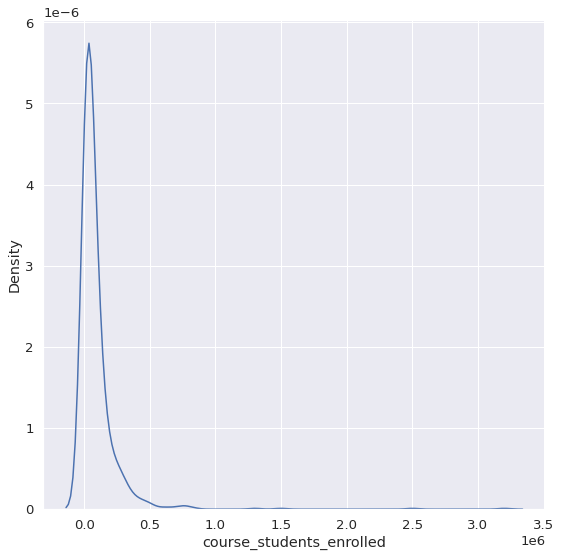

In [ ]:
sns.kdeplot(data=df, x=df['course_students_enrolled'])

##  2.displot

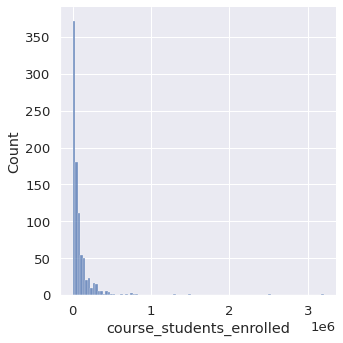

In [ ]:
sns.displot(data=df,x=df['course_students_enrolled'],kde=False,bins=100)

# Bivariate Analysis and visualization
with (course_students_enrolled) and (course_rating)

In [ ]:
df.groupby('course_rating')['course_students_enrolled'].count()


course_rating
3.3      1
3.7      1
3.9      2
4.0      2
4.1      1
4.2     10
4.3     15
4.4     34
4.5     80
4.6    168
4.7    251
4.8    256
4.9     68
5.0      2
Name: course_students_enrolled, dtype: int64

In [ ]:
df.groupby('course_rating')['course_students_enrolled'].describe()

,count,mean,std,min,25%,50%,75%,max
course_rating,,,,,,,,
3.3,1.0,140000.000000,NaN,140000.0,140000.0,140000.0,140000.0,140000.0
3.7,1.0,29000.000000,NaN,29000.0,29000.0,29000.0,29000.0,29000.0
3.9,2.0,45500.000000,43133.513652,15000.0,30250.0,45500.0,60750.0,76000.0
4.0,2.0,23000.000000,14142.135624,13000.0,18000.0,23000.0,28000.0,33000.0
4.1,1.0,34000.000000,NaN,34000.0,34000.0,34000.0,34000.0,34000.0
4.2,10.0,63720.000000,87703.652528,6200.0,8550.0,19500.0,74500.0,280000.0
4.3,15.0,41600.000000,33226.065499,11000.0,21000.0,29000.0,56000.0,140000.0
4.4,34.0,81841.176471,142373.022891,2400.0,11250.0,44500.0,97000.0,790000.0
4.5,80.0,74525.000000,116610.662930,1800.0,15250.0,36000.0,81750.0,830000.0


##  1.barplot 

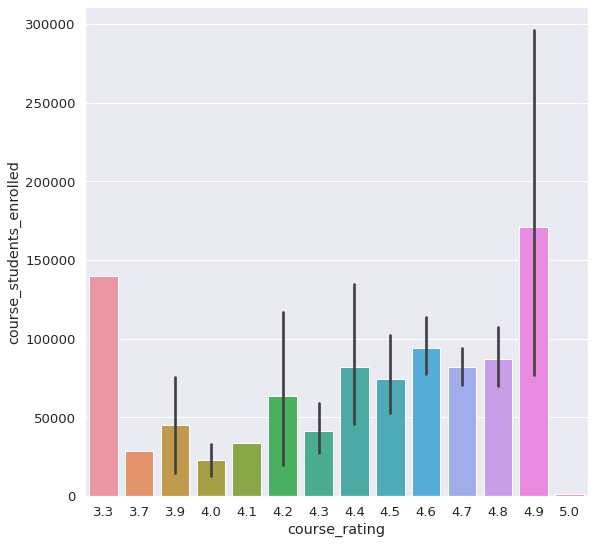

In [ ]:
sns.barplot(x='course_rating',y='course_students_enrolled',data=df)

##  2.jointplot 
* “scatter” 
* “reg” 
* “kde” 


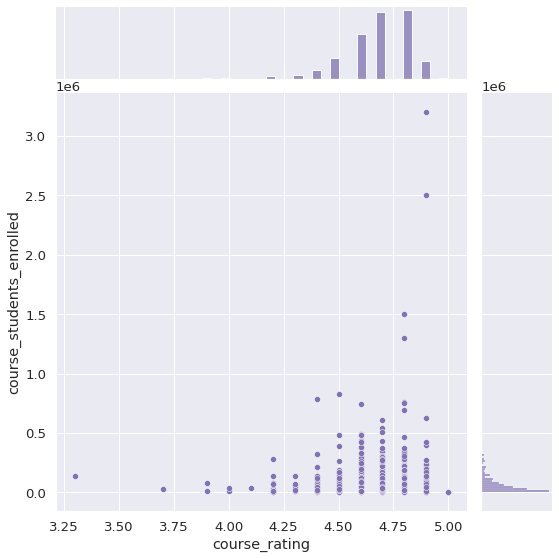

In [ ]:
sns.jointplot(data=df, y='course_students_enrolled',x='course_rating',kind='scatter', color='m',height=8) 

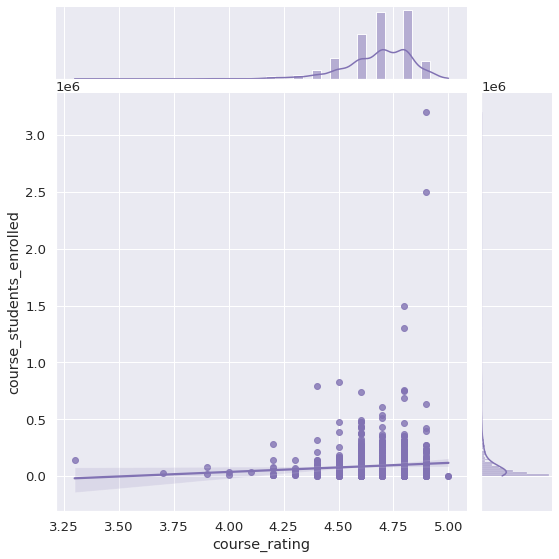

In [ ]:
sns.jointplot(data=df, y='course_students_enrolled',x='course_rating',kind='reg', color='m',height=8)

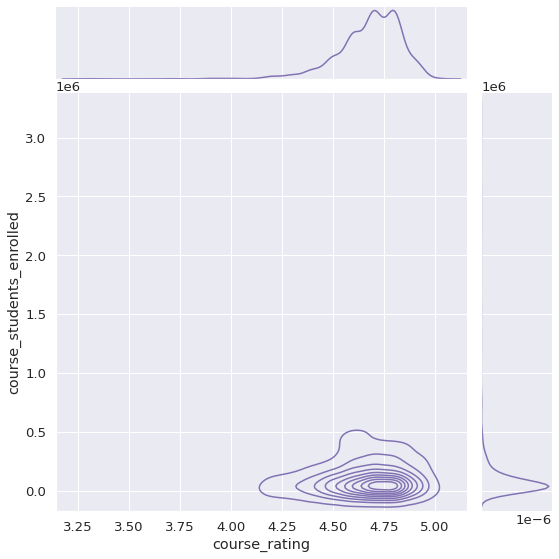

In [ ]:
sns.jointplot(data=df, y='course_students_enrolled',x='course_rating',kind='kde', color='m',height=8)

# Categorical Columns Analysis
## Univariate analysis 

In [ ]:
df.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

In [ ]:
df['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [ ]:
df['course_Certificate_type'].value_counts()

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

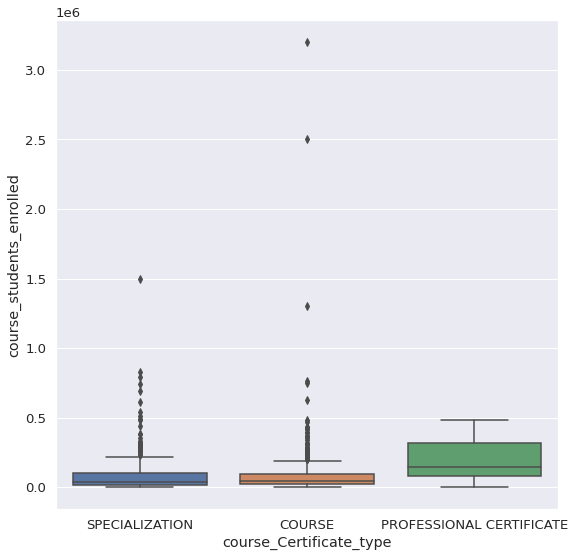

In [ ]:
sns.boxplot(x='course_Certificate_type',y='course_students_enrolled',data=df)

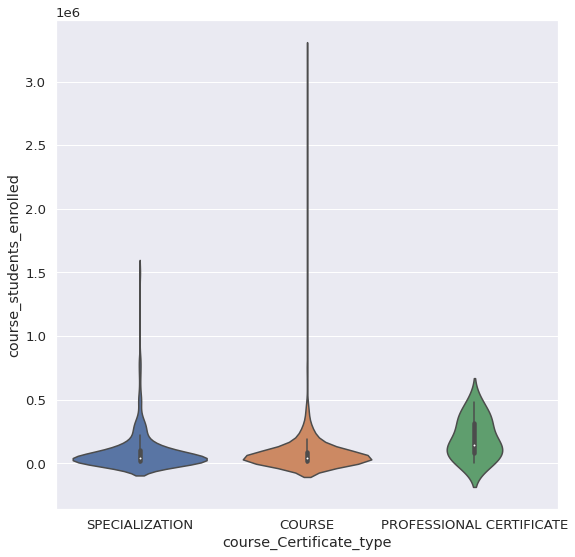

In [ ]:
sns.violinplot(x='course_Certificate_type',y='course_students_enrolled',data=df)

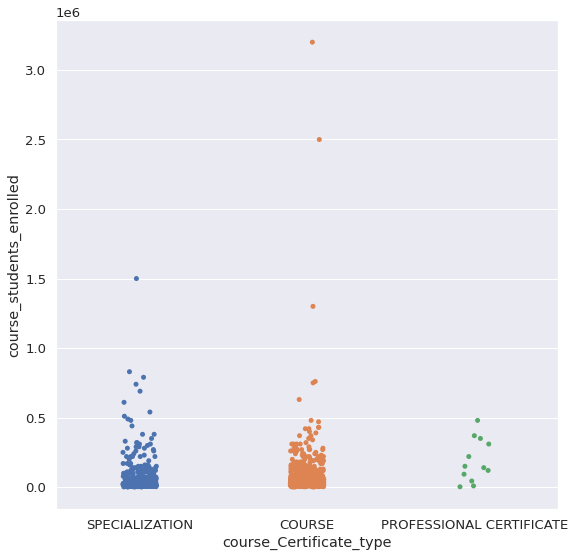

In [ ]:
sns.stripplot(x='course_Certificate_type',y='course_students_enrolled',data=df)

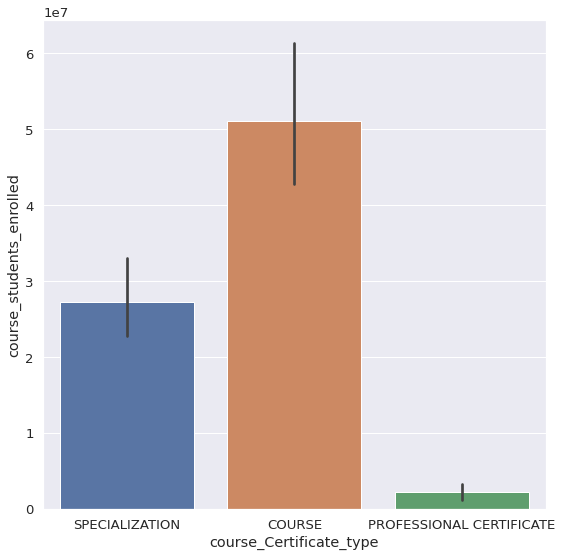

In [ ]:
sns.barplot(x='course_Certificate_type',y='course_students_enrolled',data=df,estimator=np.sum)

In [ ]:
df['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

In [ ]:
df['course_difficulty'].value_counts()

Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_difficulty, dtype: int64

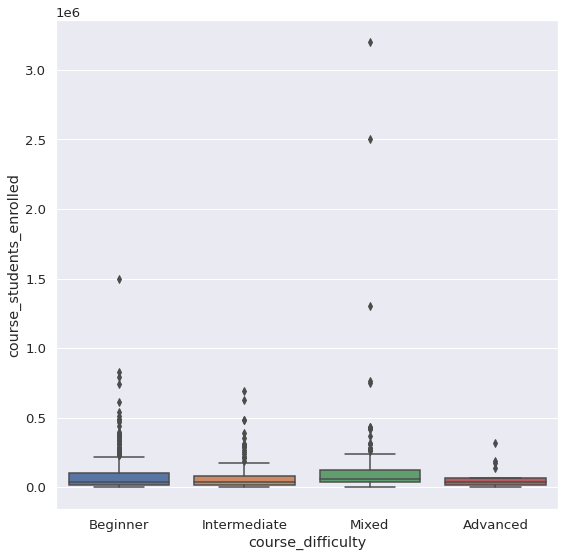

In [ ]:
sns.boxplot(x='course_difficulty',y='course_students_enrolled',data=df)

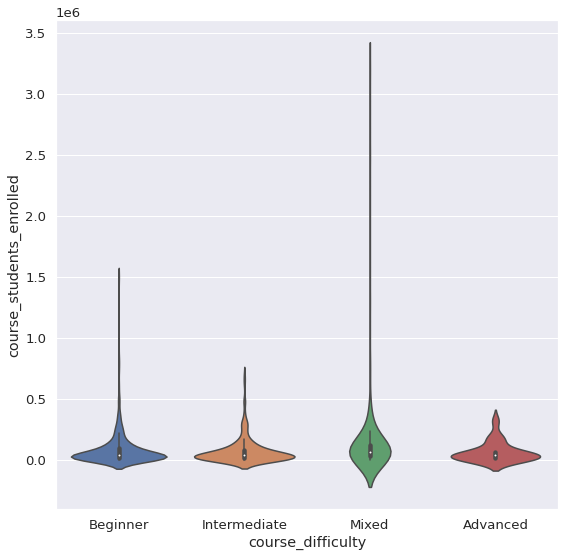

In [ ]:
sns.violinplot(x='course_difficulty',y='course_students_enrolled',data=df)

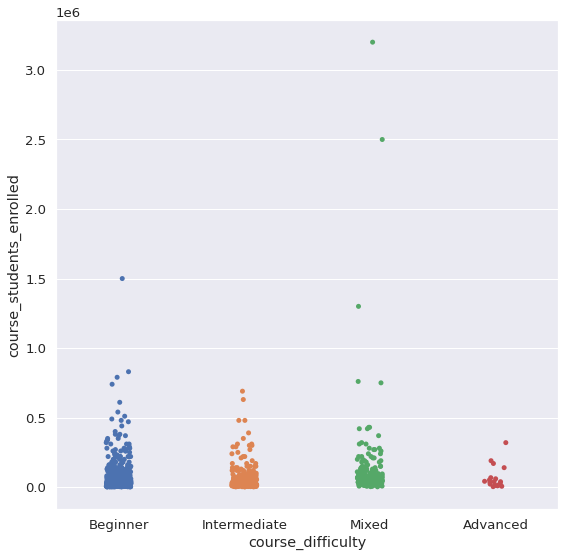

In [ ]:
sns.stripplot(x='course_difficulty',y='course_students_enrolled',data=df)

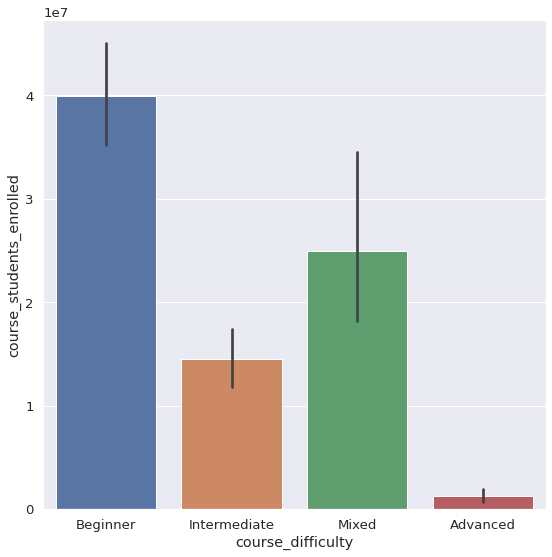

In [ ]:
sns.barplot(x='course_difficulty',y='course_students_enrolled',data=df,estimator=np.sum)

In [ ]:
df['course_rating'].astype("object")

0      4.7
1      4.7
2      4.5
3      4.7
4      4.8
      ... 
886    4.5
887    4.8
888    4.5
889    4.6
890    4.7
Name: course_rating, Length: 891, dtype: object

In [ ]:
df.groupby('course_Certificate_type').describe().T

course_Certificate_type               COURSE  ...  SPECIALIZATION
course_rating            count  5.820000e+02  ...    2.970000e+02
                         mean   4.707045e+00  ...    4.618182e+00
                         std    1.516468e-01  ...    1.678744e-01
                         min    3.300000e+00  ...    3.700000e+00
                         25%    4.600000e+00  ...    4.500000e+00
                         50%    4.700000e+00  ...    4.600000e+00
                         75%    4.800000e+00  ...    4.700000e+00
                         max    5.000000e+00  ...    5.000000e+00
course_students_enrolled count  5.820000e+02  ...    2.970000e+02
                         mean   8.785447e+04  ...    9.179192e+04
                         std    1.954303e+05  ...    1.524522e+05
                         min    1.500000e+03  ...    1.600000e+03
                         25%    1.900000e+04  ...    1.400000e+04
                         50%    4.300000e+04  ...    3.800000e+04
                         75%    9.100000e+04  ...    1.000000e+05
                         max    3.200000e+06  ...    1.500000e+06

[16 rows x 3 columns]

In [ ]:
pd.pivot_table(df, index=['course_Certificate_type'], values='course_students_enrolled')

,course_students_enrolled
course_Certificate_type,
COURSE,87854.467354
PROFESSIONAL CERTIFICATE,190700.000000
SPECIALIZATION,91791.919192


In [ ]:
pd.pivot_table(df, index=['course_difficulty'], values='course_students_enrolled')

,course_students_enrolled
course_difficulty,
Advanced,66547.368421
Beginner,81974.948665
Intermediate,73264.141414
Mixed,133633.155080


In [ ]:
pd.pivot_table(df, index=['course_rating'], values='course_students_enrolled')

,course_students_enrolled
course_rating,
3.3,140000.000000
3.7,29000.000000
3.9,45500.000000
4.0,23000.000000
4.1,34000.000000
4.2,63720.000000
4.3,41600.000000
4.4,81841.176471
4.5,74525.000000


In [ ]:
pd.pivot_table(df, index=['course_Certificate_type'], columns='course_difficulty', values='course_students_enrolled')

course_difficulty,Advanced,Beginner,Intermediate,Mixed
course_Certificate_type,,,,
COURSE,45188.888889,68835.106383,60804.807692,133633.15508
PROFESSIONAL CERTIFICATE,NaN,190933.333333,190000.000000,NaN
SPECIALIZATION,85770.000000,95877.040816,83654.945055,NaN


In [ ]:
pd.pivot_table(df, columns='course_Certificate_type',index=['course_rating'], values='course_students_enrolled')

course_Certificate_type,COURSE,PROFESSIONAL CERTIFICATE,SPECIALIZATION
course_rating,,,
3.3,140000.000000,NaN,NaN
3.7,NaN,NaN,29000.000000
3.9,NaN,NaN,45500.000000
4.0,23000.000000,NaN,NaN
4.1,NaN,NaN,34000.000000
4.2,97566.666667,NaN,12950.000000
4.3,42800.000000,NaN,41000.000000
4.4,43623.076923,NaN,105500.000000
4.5,57386.842105,NaN,90030.952381


In [ ]:
pd.pivot_table(df, columns='course_difficulty',index=['course_rating'], values='course_students_enrolled')

course_difficulty,Advanced,Beginner,Intermediate,Mixed
course_rating,,,,
3.3,NaN,NaN,NaN,140000.000000
3.7,NaN,NaN,29000.000000,NaN
3.9,NaN,NaN,45500.000000,NaN
4.0,NaN,NaN,23000.000000,NaN
4.1,NaN,34000.000000,NaN,NaN
4.2,6200.0,57150.000000,17200.000000,122666.666667
4.3,60000.0,35200.000000,26500.000000,79500.000000
4.4,161750.0,98762.500000,57069.230769,45666.666667
4.5,78400.0,75917.500000,74452.000000,67200.000000


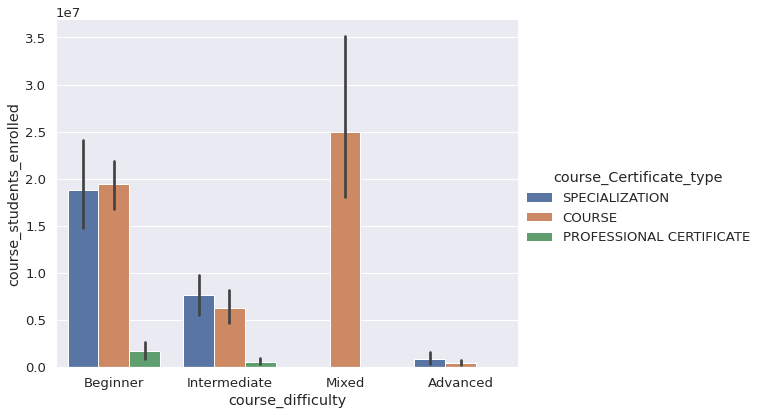

In [ ]:
sns.catplot(x='course_difficulty',y='course_students_enrolled',hue='course_Certificate_type',data=df,height=6, aspect=1.3, kind="bar",  estimator=np.sum)

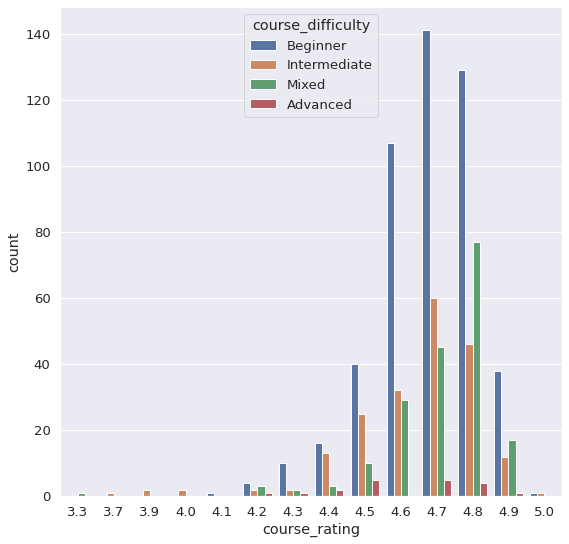

In [ ]:
sns.countplot(data=df,x = 'course_rating',hue= 'course_difficulty')

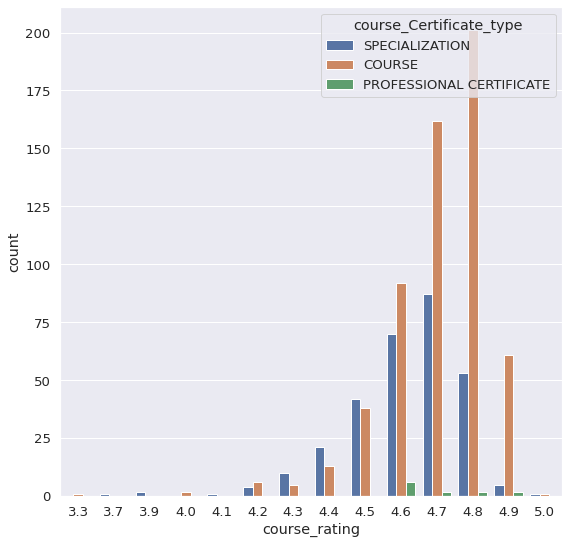

In [ ]:
sns.countplot(data=df,x = 'course_rating',hue= 'course_Certificate_type')

In [ ]:
df['course_title'].unique()

array(['(ISC)² Systems Security Certified Practitioner (SSCP)',
       'A Crash Course in Causality:  Inferring Causal Effects from Observational Data',
       'A Crash Course in Data Science', "A Law Student's Toolkit",
       'A Life of Happiness and Fulfillment',
       'ADHD: Everyday Strategies for Elementary Students',
       'AI For Everyone', 'AI For Medical Treatment',
       'AI Foundations for Everyone', 'AI for Medical Diagnosis',
       'AI for Medical Prognosis', 'AI for Medicine', 'AWS Fundamentals',
       'AWS Fundamentals: Addressing Security Risk',
       'AWS Fundamentals: Building Serverless Applications',
       'AWS Fundamentals: Going Cloud-Native',
       'AWS Fundamentals: Migrating to the Cloud',
       'Aboriginal Worldviews and Education', 'Academic English: Writing',
       'Accelerated Computer Science Fundamentals', 'Access Controls',
       'Accounting Analytics', 'Accounting for Decision Making',
       'Achieving Personal and Professional Success',
  

In [ ]:
df['course_title'].value_counts()


Machine Learning                                            2
Developing Your Musicianship                                2
Marketing Digital                                           2
The Business of Music Production                            1
Introduction to Systems Engineering                         1
                                                           ..
TensorFlow: Data and Deployment                             1
Habilidades Gerenciales                                     1
Solar Energy Basics                                         1
Introduction to User Experience Principles and Processes    1
Process Mining: Data science in Action                      1
Name: course_title, Length: 888, dtype: int64

In [ ]:
df['course_organization'].value_counts()


University of Pennsylvania            59
University of Michigan                41
Google Cloud                          34
Duke University                       28
Johns Hopkins University              28
                                      ..
Cloudera                               1
The University of Hong Kong            1
IE School of Architecture & Design     1
University of New Mexico               1
UCL School of Management               1
Name: course_organization, Length: 154, dtype: int64

In [ ]:
df['course_organization'].unique()


array(['(ISC)²', 'University of Pennsylvania', 'Johns Hopkins University',
       'Yale University', 'Indian School of Business',
       'University at Buffalo', 'deeplearning.ai', 'IBM',
       'Amazon Web Services', 'University of Toronto',
       'University of California, Irvine',
       'University of Illinois at Urbana-Champaign',
       'University of Michigan',
       'Universidad Nacional Autónoma de México',
       'University of Colorado Boulder',
       'National Research University Higher School of Economics',
       'Google Cloud', 'Erasmus University Rotterdam', 'Duke University',
       'University of Virginia', 'Atlassian', 'ScrumTrek',
       'University of California San Diego', 'Stanford University',
       'University of Colorado System', 'Copenhagen Business School',
       'Macquarie University', 'Vanderbilt University',
       'The University of Edinburgh',
       'Technical University of Denmark (DTU)', 'Universidad Austral',
       'Arizona State University', 